In [2]:
import re

def count_uppercase_words(file_path):
    # Read text from file
    with open(file_path, 'r') as file:
        text = file.read()
    
    # Extract all words from the text
    words = re.findall(r'\b\w+\b', text)
    
    # Count uppercase words
    uppercase_count = 0
    uppercase_words = []
    
    for word in words:
        if word.isupper() and len(word) > 1:  # Optional: ignore single letters
            uppercase_count += 1
            uppercase_words.append(word)
    
    return uppercase_count, uppercase_words

# Example usage
file_path = 'leaked_cursor_agent.txt'  # Path to your text file
count, uppercase_list = count_uppercase_words(file_path)

print(f"Number of uppercase words: {count}")
print("Uppercase words found:")
for word in uppercase_list:
    print(f"- {word}")

Number of uppercase words: 47
Uppercase words found:
- AI
- IDE
- USER
- USER
- USER
- ALWAYS
- NEVER
- NEVER
- USER
- USER
- USER
- NEVER
- USER
- EXTREMELY
- USER
- README
- UI
- UX
- NEVER
- USER
- MUST
- DO
- NOT
- COMPLETE
- PROPOSE
- DO
- USER
- NOT
- NOT
- WAITING
- NOT
- ANY
- MUST
- NOT
- ONLY
- NEVER
- ONLY
- IF
- MUST
- ONLY
- OS
- 3A
- WINDOWS
- IF
- EXACTLY
- DO
- NOT


Found 22 unique uppercase words:
- USER: 10 occurrences
- NOT: 6 occurrences
- NEVER: 5 occurrences
- MUST: 3 occurrences
- DO: 3 occurrences
- ONLY: 3 occurrences
- IF: 2 occurrences
- AI: 1 occurrences
- IDE: 1 occurrences
- ALWAYS: 1 occurrences
- EXTREMELY: 1 occurrences
- README: 1 occurrences
- UI: 1 occurrences
- UX: 1 occurrences
- COMPLETE: 1 occurrences
- PROPOSE: 1 occurrences
- WAITING: 1 occurrences
- ANY: 1 occurrences
- OS: 1 occurrences
- 3A: 1 occurrences
- WINDOWS: 1 occurrences
- EXACTLY: 1 occurrences


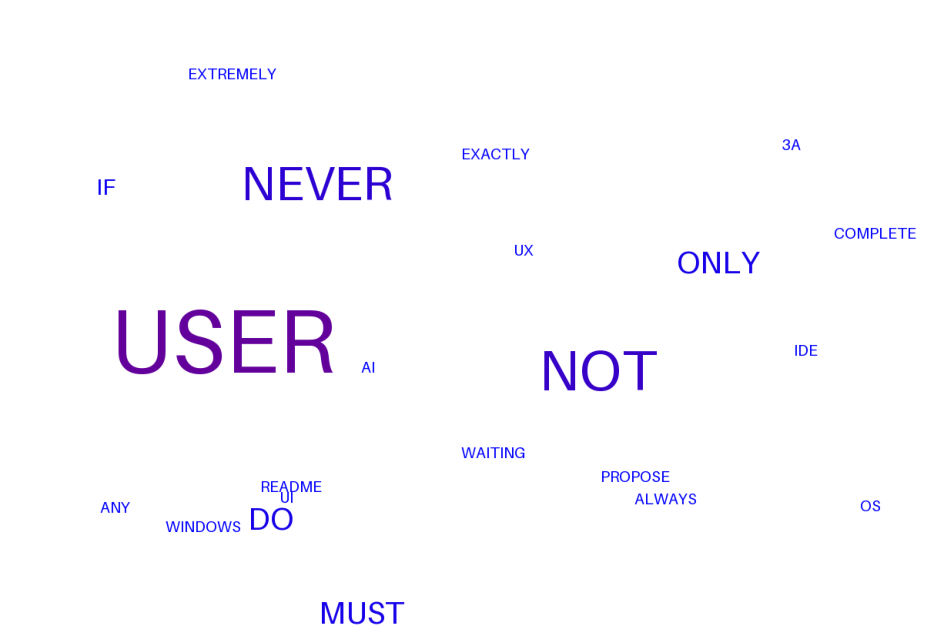

Word cloud image saved to: uppercase_wordcloud.png
Total words in text: 2844
Total uppercase words: 47
Percentage of uppercase words: 1.65%

Most common uppercase words:
- USER: 10 occurrences
- NOT: 6 occurrences
- NEVER: 5 occurrences
- MUST: 3 occurrences
- DO: 3 occurrences


In [4]:
# %% [markdown]
# # Uppercase Word Cloud Generator
# 
# This notebook reads a text file, identifies all words in UPPERCASE, and creates a word cloud where the font size of each word corresponds to how frequently it appears in the text.

# %%
# Import required libraries
import re
from collections import Counter
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import display

# %% [markdown]
# ## Step 1: Read and Process the Text File

# %%
def count_uppercase_words(file_path):
    # Read text from file
    with open(file_path, 'r') as file:
        text = file.read()
    
    # Extract all words from the text
    words = re.findall(r'\b\w+\b', text)
    
    # Count uppercase words
    uppercase_words = [word for word in words if word.isupper() and len(word) > 1]
    
    # Count frequency of each uppercase word
    word_counts = Counter(uppercase_words)
    
    return word_counts, text

# Specify your file path
file_path = 'leaked_cursor_agent.txt'  # Change this to your file path

# Count uppercase words
word_counts, original_text = count_uppercase_words(file_path)

# Display the results
print(f"Found {len(word_counts)} unique uppercase words:")
for word, count in sorted(word_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"- {word}: {count} occurrences")

# %% [markdown]
# ## Step 2: Create the Word Cloud

# %%
def create_word_cloud(word_counts, output_path='uppercase_wordcloud.png'):
    # Create a blank white image
    width, height = 1200, 800
    image = Image.new('RGB', (width, height), color='white')
    draw = ImageDraw.Draw(image)
    
    # Calculate the maximum font size based on word frequency
    max_count = max(word_counts.values()) if word_counts else 1
    min_count = min(word_counts.values()) if word_counts else 1
    min_font_size = 20
    max_font_size = 120
    
    # Place words randomly on the image
    placed_rectangles = []
    
    for word, count in sorted(word_counts.items(), key=lambda x: x[1], reverse=True):
        # Calculate font size based on count
        font_size = int(min_font_size + (max_font_size - min_font_size) * 
                        ((count - min_count) / (max_count - min_count + 0.1)))
        
        # Use a font that supports various alphabets
        try:
            font = ImageFont.truetype("arial.ttf", font_size)
        except IOError:
            # Fall back to default
            font = ImageFont.load_default().font_variant(size=font_size)
        
        # Get text size
        bbox = draw.textbbox((0, 0), word, font=font)
        text_width = bbox[2] - bbox[0]
        text_height = bbox[3] - bbox[1]
        
        # Try to find a place for the word
        placed = False
        attempts = 0
        max_attempts = 100
        
        while not placed and attempts < max_attempts:
            # Generate random position
            x = random.randint(10, width - text_width - 10)
            y = random.randint(10, height - text_height - 10)
            
            # Create rectangle for this text
            current_rect = (x, y, x + text_width, y + text_height)
            
            # Check for overlaps
            overlap = False
            for rect in placed_rectangles:
                if (current_rect[0] < rect[2] and current_rect[2] > rect[0] and
                    current_rect[1] < rect[3] and current_rect[3] > rect[1]):
                    overlap = True
                    break
            
            if not overlap:
                placed = True
                placed_rectangles.append(current_rect)
                
                # Choose a color based on frequency (darker = more frequent)
                color_intensity = int(155 + 100 * (1 - (count - min_count) / (max_count - min_count + 0.1)))
                text_color = (255 - color_intensity, 0, color_intensity)
                
                # Draw the text
                draw.text((x, y), word, font=font, fill=text_color)
            
            attempts += 1
        
        # If couldn't place after max attempts, force placement
        if not placed:
            x = random.randint(10, width - text_width - 10)
            y = random.randint(10, height - text_height - 10)
            draw.text((x, y), word, font=font, fill=(0, 0, 0))
    
    # Save the image
    image.save(output_path)
    return image, output_path

# Create and save the word cloud
if word_counts:
    img, output_path = create_word_cloud(word_counts)
    
    # Display the image in the notebook
    plt.figure(figsize=(12, 8))
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.show()
    
    print(f"Word cloud image saved to: {output_path}")
else:
    print("No uppercase words found to create word cloud.")

# %% [markdown]
# ## Step 3: Analyze the Original Text

# %%
# Calculate the percentage of uppercase words in the text
all_words = re.findall(r'\b\w+\b', original_text)
total_words = len(all_words)
uppercase_word_count = sum(word_counts.values())

print(f"Total words in text: {total_words}")
print(f"Total uppercase words: {uppercase_word_count}")
print(f"Percentage of uppercase words: {(uppercase_word_count/total_words)*100:.2f}%")

# Most common uppercase words (top 5)
print("\nMost common uppercase words:")
for word, count in word_counts.most_common(5):
    print(f"- {word}: {count} occurrences")

In [6]:
import re
from collections import Counter
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import random

def count_uppercase_words(file_path):
    # Read text from file
    with open(file_path, 'r') as file:
        text = file.read()
    
    # Extract all words from the text
    words = re.findall(r'\b\w+\b', text)
    
    # Count uppercase words
    uppercase_words = [word for word in words if word.isupper() and len(word) > 1]
    
    # Count frequency of each uppercase word
    word_counts = Counter(uppercase_words)
    
    return word_counts

def create_word_cloud(word_counts, output_path='uppercase_wordcloudv2.png'):
    # Create an image with a nice gradient background
    width, height = 1200, 800
    image = Image.new('RGB', (width, height), color='white')
    
    # Create a gradient background (from dark blue to lighter blue)
    draw = ImageDraw.Draw(image)
    for y in range(height):
        # Create a smooth gradient from dark to light
        r = int(25 + (y / height) * 35)  # dark to lighter blue
        g = int(42 + (y / height) * 80)
        b = int(86 + (y / height) * 80)
        for x in range(width):
            draw.point((x, y), fill=(r, g, b))
    draw = ImageDraw.Draw(image)
    
    # Calculate the maximum font size based on word frequency
    max_count = max(word_counts.values()) if word_counts else 1
    min_count = min(word_counts.values()) if word_counts else 1
    min_font_size = 20
    max_font_size = 120
    
    # Place words randomly on the image
    placed_rectangles = []
    
    for word, count in sorted(word_counts.items(), key=lambda x: x[1], reverse=True):
        # Calculate font size based on count
        font_size = int(min_font_size + (max_font_size - min_font_size) * 
                        ((count - min_count) / (max_count - min_count + 0.1)))
        
        # Use a font that supports various alphabets
        try:
            font = ImageFont.truetype("arial.ttf", font_size)
        except IOError:
            # Fall back to default
            font = ImageFont.load_default().font_variant(size=font_size)
        
        # Get text size
        bbox = draw.textbbox((0, 0), word, font=font)
        text_width = bbox[2] - bbox[0]
        text_height = bbox[3] - bbox[1]
        
        # Try to find a place for the word
        placed = False
        attempts = 0
        max_attempts = 100
        
        while not placed and attempts < max_attempts:
            # Generate random position
            x = random.randint(10, width - text_width - 10)
            y = random.randint(10, height - text_height - 10)
            
            # Create rectangle for this text
            current_rect = (x, y, x + text_width, y + text_height)
            
            # Check for overlaps
            overlap = False
            for rect in placed_rectangles:
                if (current_rect[0] < rect[2] and current_rect[2] > rect[0] and
                    current_rect[1] < rect[3] and current_rect[3] > rect[1]):
                    overlap = True
                    break
            
            if not overlap:
                placed = True
                placed_rectangles.append(current_rect)
                
                # Choose from a beautiful color palette based on frequency
                # Using a vibrant color palette with blues, purples, teals, and reds
                colormap = [
                    (53, 92, 125),     # Deep Blue
                    (108, 91, 123),    # Purple
                    (192, 108, 132),   # Pink
                    (246, 114, 128),   # Coral
                    (248, 177, 149),   # Peach
                    (116, 198, 157),   # Teal
                    (73, 190, 170),    # Turquoise
                    (0, 180, 216),     # Bright Blue
                    (247, 143, 179),   # Rose
                    (255, 116, 116)    # Bright Red
                ]
                
                # Assign colors based on word frequency relative to others
                color_index = int((count - min_count) / (max_count - min_count + 0.1) * (len(colormap) - 1))
                text_color = colormap[color_index]
                
                # Draw the text
                draw.text((x, y), word, font=font, fill=text_color)
            
            attempts += 1
        
        # If couldn't place after max attempts, force placement
        if not placed:
            x = random.randint(10, width - text_width - 10)
            y = random.randint(10, height - text_height - 10)
            draw.text((x, y), word, font=font, fill=(0, 0, 0))
    
    # Save the image
    image.save(output_path)
    print(f"Word cloud saved to {output_path}")
    return output_path

# Main execution
def main():
    file_path = 'leaked_cursor_agent.txt'  # Path to your text file
    word_counts = count_uppercase_words(file_path)
    
    if not word_counts:
        print("No uppercase words found in the file.")
        return
    
    print(f"Found {len(word_counts)} unique uppercase words:")
    for word, count in sorted(word_counts.items(), key=lambda x: x[1], reverse=True):
        print(f"- {word}: {count} occurrences")
    
    output_path = create_word_cloud(word_counts)
    print(f"Word cloud image created at: {output_path}")

if __name__ == "__main__":
    main()

Found 22 unique uppercase words:
- USER: 10 occurrences
- NOT: 6 occurrences
- NEVER: 5 occurrences
- MUST: 3 occurrences
- DO: 3 occurrences
- ONLY: 3 occurrences
- IF: 2 occurrences
- AI: 1 occurrences
- IDE: 1 occurrences
- ALWAYS: 1 occurrences
- EXTREMELY: 1 occurrences
- README: 1 occurrences
- UI: 1 occurrences
- UX: 1 occurrences
- COMPLETE: 1 occurrences
- PROPOSE: 1 occurrences
- WAITING: 1 occurrences
- ANY: 1 occurrences
- OS: 1 occurrences
- 3A: 1 occurrences
- WINDOWS: 1 occurrences
- EXACTLY: 1 occurrences
Word cloud saved to uppercase_wordcloudv2.png
Word cloud image created at: uppercase_wordcloudv2.png
